# Senior Project Implementation

### Hala Haneya - Hanin Balbaid - Hafsah Ranjha

---


## Import Libraries


In [1]:
import os
import pandas as pd
import xgboost as xgb
from pandas import read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from matplotlib import figure
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

## Load the Dataset

In [2]:
# This allows us to mount google drive and be able to access datasets from there
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# !pip install xlrd
# !pip install openpyxl
# !pip install --upgrade xlrd

In [4]:
url = r"data\dataset.csv"
df = pd.read_csv(url, header = 0)

## Explore Dataset

### Peek at data

In [5]:
# shape
df.shape

(552, 15)

In [6]:
#head
df.head(10)

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other
0,Primary Care Center,Female,14,NaN,83.0,NaN,95+,NaN,Yes,NaN,NaN,,over 10 years-adolescents,Upper Respir,NaN
1,Primary Care Center,Female,13,NaN,42.0,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Gastroenteri,NaN
2,Primary Care Center,Male,14,NaN,46.1,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Other,Leg trauma
3,Primary Care Center,Male,14,NaN,67.0,NaN,85 to <95,NaN,Yes,NaN,NaN,,over 10 years-adolescents,Gastroenteri,NaN
4,Primary Care Center,Female,13,156.0,49.0,20.134779,5 to <85,2.0,No,NaN,NaN,,over 10 years-adolescents,Other,Vertigo
5,Primary Care Center,Male,7,110.0,17.2,14.214876,5 to <85,2.0,No,NaN,NaN,,under 10years-children,Other,Chicken pox
6,Primary Care Center,Female,6,133.0,22.0,12.437108,85 to <95,1.0,Yes,NaN,NaN,,under 10years-children,Other,Impaired vision
7,Primary Care Center,Male,9,NaN,25.0,NaN,5 to <85,NaN,No,NaN,NaN,,under 10years-children,Other,EBV infection
8,Primary Care Center,Female,14,NaN,57.0,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Upper Respir,NaN
9,Primary Care Center,Male,6,NaN,17.6,NaN,<5,NaN,No,NaN,NaN,,under 10years-children,Abdominal Pa,NaN


In [7]:
df.dtypes

Patient_seen_at              object
Gender                       object
Age                           int64
height                      float64
weight                      float64
BMIc                        float64
BMI_Percentile               object
BMC_perecent_481            float64
Patient_is_Overwiegh         object
Obesity_identified           object
Phy_Action                   object
Physicians_Actions_other     object
Age10yrs                     object
Diagnosis                    object
Diagnosis_other              object
dtype: object

In [8]:
#Find the missing values from each column
df.isnull().sum()

Patient_seen_at               0
Gender                        0
Age                           0
height                       71
weight                        0
BMIc                         71
BMI_Percentile                3
BMC_perecent_481             71
Patient_is_Overwiegh          0
Obesity_identified          466
Phy_Action                  535
Physicians_Actions_other      0
Age10yrs                      0
Diagnosis                     0
Diagnosis_other             385
dtype: int64

### Stastical Summary


In [9]:
#descriptions
df.describe()

,Age,height,weight,BMIc,BMC_perecent_481
count,552.000000,481.000000,552.000000,481.000000,481.000000
mean,9.344203,129.631809,31.151268,17.107735,2.083160
std,2.528459,14.214220,13.920186,4.268677,0.832508
min,6.000000,99.000000,12.000000,10.592472,1.000000
25%,7.000000,119.500000,21.375000,14.244643,2.000000
50%,9.000000,128.200000,27.150000,16.120564,2.000000
75%,11.000000,139.000000,36.325000,18.432000,2.000000
max,14.000000,167.000000,85.000000,34.927680,4.000000


In [10]:
df['height']

0        NaN
1        NaN
2        NaN
3        NaN
4      156.0
       ...  
547    153.0
548    136.0
549    119.0
550    115.5
551    119.0
Name: height, Length: 552, dtype: float64

## Data Preprocessing 

In [11]:
df.groupby('Patient_is_Overwiegh').size()

Patient_is_Overwiegh
No     445
Yes    107
dtype: int64

In [12]:
df.groupby('Obesity_identified').size()

Obesity_identified
No     69
Yes    17
dtype: int64

In [13]:
df.isnull().sum()*100/len(df)

Patient_seen_at              0.000000
Gender                       0.000000
Age                          0.000000
height                      12.862319
weight                       0.000000
BMIc                        12.862319
BMI_Percentile               0.543478
BMC_perecent_481            12.862319
Patient_is_Overwiegh         0.000000
Obesity_identified          84.420290
Phy_Action                  96.920290
Physicians_Actions_other     0.000000
Age10yrs                     0.000000
Diagnosis                    0.000000
Diagnosis_other             69.746377
dtype: float64

### Labelling

In [14]:
# create a function
def bmi_class(percentile):
    if  percentile == '95+':
        return 'Obese'
    elif percentile == '85 to <95':
        return 'Overweight'
    elif percentile == '5 to <85':
        return 'Normal weight'
    elif percentile == '<5':
        return 'Underweight'
    else: 
        return 'null'

# create a new column based on condition
df['bmi_class'] = df['BMI_Percentile'].apply(bmi_class)
# display the dataframe
df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,NaN,83.0,NaN,95+,NaN,Yes,NaN,NaN,,over 10 years-adolescents,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,NaN,42.0,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,NaN,46.1,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,NaN,67.0,NaN,85 to <95,NaN,Yes,NaN,NaN,,over 10 years-adolescents,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,156.0,49.0,20.134779,5 to <85,2.0,No,NaN,NaN,,over 10 years-adolescents,Other,Vertigo,Normal weight


### Is Overweight?

In [15]:
# create a function
def is_overweight(bmi_class):
    if bmi_class == 'Overweight':
        return 'Yes'
    else:
        return 'No'

# create a new column based on condition
df['Patient_is_Overwiegh'] = df['bmi_class'].apply(is_overweight)
# display the dataframe
df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,NaN,83.0,NaN,95+,NaN,No,NaN,NaN,,over 10 years-adolescents,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,NaN,42.0,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,NaN,46.1,NaN,5 to <85,NaN,No,NaN,NaN,,over 10 years-adolescents,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,NaN,67.0,NaN,85 to <95,NaN,Yes,NaN,NaN,,over 10 years-adolescents,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,156.0,49.0,20.134779,5 to <85,2.0,No,NaN,NaN,,over 10 years-adolescents,Other,Vertigo,Normal weight


### Is Obese?

In [16]:
# create a function
def is_obese(bmi_class):
    if bmi_class == 'Obese':
        return 'Yes'
    else: 
        return 'No'

# create a new column based on condition
df['Obesity_identified'] = df['bmi_class'].apply(is_obese)
# display the dataframe
df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,NaN,83.0,NaN,95+,NaN,No,Yes,NaN,,over 10 years-adolescents,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,NaN,42.0,NaN,5 to <85,NaN,No,No,NaN,,over 10 years-adolescents,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,NaN,46.1,NaN,5 to <85,NaN,No,No,NaN,,over 10 years-adolescents,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,NaN,67.0,NaN,85 to <95,NaN,Yes,No,NaN,,over 10 years-adolescents,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,156.0,49.0,20.134779,5 to <85,2.0,No,No,NaN,,over 10 years-adolescents,Other,Vertigo,Normal weight


In [17]:
print(df.groupby('Patient_is_Overwiegh').size())
print(df.groupby('Obesity_identified').size())


Patient_is_Overwiegh
No     503
Yes     49
dtype: int64
Obesity_identified
No     493
Yes     59
dtype: int64


### Over/Below Age 10?

In [18]:
# create a function
def age_ten(age):
    if  age == 'over 10 years-adolescents':
        return 1
    else: 
        return 0

# Adjusts value of Age10yrs column
df['Age10yrs'] = df['Age10yrs'].apply(age_ten)
# display the dataframe
df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,NaN,83.0,NaN,95+,NaN,No,Yes,NaN,,1,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,NaN,42.0,NaN,5 to <85,NaN,No,No,NaN,,1,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,NaN,46.1,NaN,5 to <85,NaN,No,No,NaN,,1,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,NaN,67.0,NaN,85 to <95,NaN,Yes,No,NaN,,1,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,156.0,49.0,20.134779,5 to <85,2.0,No,No,NaN,,1,Other,Vertigo,Normal weight


In [19]:
df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,NaN,83.0,NaN,95+,NaN,No,Yes,NaN,,1,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,NaN,42.0,NaN,5 to <85,NaN,No,No,NaN,,1,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,NaN,46.1,NaN,5 to <85,NaN,No,No,NaN,,1,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,NaN,67.0,NaN,85 to <95,NaN,Yes,No,NaN,,1,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,156.0,49.0,20.134779,5 to <85,2.0,No,No,NaN,,1,Other,Vertigo,Normal weight


### Imputing the height column

In [20]:
# imputer
from sklearn.impute import SimpleImputer, KNNImputer

# initialize imputer
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df[['height']])
df['height'] = imputer.transform(df[['height']])
df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,129.631809,83.0,NaN,95+,NaN,No,Yes,NaN,,1,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,129.631809,42.0,NaN,5 to <85,NaN,No,No,NaN,,1,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,129.631809,46.1,NaN,5 to <85,NaN,No,No,NaN,,1,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,129.631809,67.0,NaN,85 to <95,NaN,Yes,No,NaN,,1,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,156.000000,49.0,20.134779,5 to <85,2.0,No,No,NaN,,1,Other,Vertigo,Normal weight


In [21]:
df.isnull().sum()

Patient_seen_at               0
Gender                        0
Age                           0
height                        0
weight                        0
BMIc                         71
BMI_Percentile                3
BMC_perecent_481             71
Patient_is_Overwiegh          0
Obesity_identified            0
Phy_Action                  535
Physicians_Actions_other      0
Age10yrs                      0
Diagnosis                     0
Diagnosis_other             385
bmi_class                     0
dtype: int64

### Calculating BMI

In [22]:
from numpy import NaN
import numpy as np
import math

for row in df.values:
    if pd.isnull(df['BMIc'][1]):
        df['height'] = df['height'] / 100.0
        df['BMIc'] = df['weight'] / (df['height'] * df['height'])

df.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Phy_Action,Physicians_Actions_other,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,1.296318,83.0,49.391809,95+,NaN,No,Yes,NaN,,1,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,1.296318,42.0,24.993445,5 to <85,NaN,No,No,NaN,,1,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,1.296318,46.1,27.433282,5 to <85,NaN,No,No,NaN,,1,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,1.296318,67.0,39.870496,85 to <95,NaN,Yes,No,NaN,,1,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,1.560000,49.0,20.134780,5 to <85,2.0,No,No,NaN,,1,Other,Vertigo,Normal weight


In [23]:
df['BMI_Percentile'].isnull().sum()
df = df[df['BMI_Percentile'].notna()] #instead of dropping, take another DF with non-na values

In [24]:
# df.shape

### Creating the predicting dataframe

In [25]:
df_pred = df

In [26]:
df_pred.shape

(549, 16)

In [27]:
df_pred.drop('Phy_Action', axis = 1, inplace = True)
df_pred.drop('Physicians_Actions_other', axis = 1, inplace  = True)

### Encoding

In [28]:
df_pred.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,Primary Care Center,Female,14,1.296318,83.0,49.391809,95+,NaN,No,Yes,1,Upper Respir,NaN,Obese
1,Primary Care Center,Female,13,1.296318,42.0,24.993445,5 to <85,NaN,No,No,1,Gastroenteri,NaN,Normal weight
2,Primary Care Center,Male,14,1.296318,46.1,27.433282,5 to <85,NaN,No,No,1,Other,Leg trauma,Normal weight
3,Primary Care Center,Male,14,1.296318,67.0,39.870496,85 to <95,NaN,Yes,No,1,Gastroenteri,NaN,Overweight
4,Primary Care Center,Female,13,1.560000,49.0,20.134780,5 to <85,2.0,No,No,1,Other,Vertigo,Normal weight


In [29]:
#Label Encoding on the categorical attributes
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
df_pred['Patient_seen_at'] = labelencoder.fit_transform(df_pred['Patient_seen_at'])
df_pred['Gender'] = labelencoder.fit_transform(df_pred['Gender'])
df_pred['BMI_Percentile'] = labelencoder.fit_transform(df_pred['BMI_Percentile'])
df_pred['Patient_is_Overwiegh'] = labelencoder.fit_transform(df_pred['Patient_is_Overwiegh'])
df_pred['Obesity_identified'] = labelencoder.fit_transform(df_pred['Obesity_identified'])
df_pred['Age10yrs'] = labelencoder.fit_transform(df_pred['Age10yrs'])
df_pred['Diagnosis'] = labelencoder.fit_transform(df_pred['Diagnosis'])
df_pred['Diagnosis_other'] = labelencoder.fit_transform(df_pred['Diagnosis_other'])
#df_pred['bmi_class'] = labelencoder.fit_transform(df_pred['bmi_class'])
df_pred.head()


,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,BMC_perecent_481,Patient_is_Overwiegh,Obesity_identified,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,1,0,14,1.296318,83.0,49.391809,2,NaN,0,1,1,15,113,Obese
1,1,0,13,1.296318,42.0,24.993445,0,NaN,0,0,1,8,113,Normal weight
2,1,1,14,1.296318,46.1,27.433282,0,NaN,0,0,1,12,63,Normal weight
3,1,1,14,1.296318,67.0,39.870496,1,NaN,1,0,1,8,113,Overweight
4,1,0,13,1.560000,49.0,20.134780,0,2.0,0,0,1,12,106,Normal weight


## Balancing using Oversampling

bmi_class
Normal weight    336
Obese             59
Overweight        49
Underweight      105
dtype: int64


<AxesSubplot:xlabel='bmi_class'>

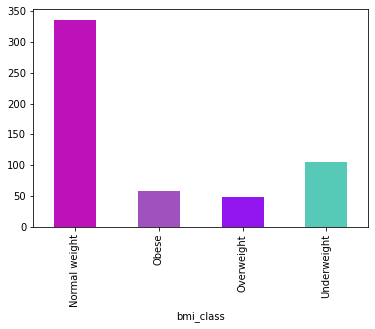

In [30]:
# imbalanced class distribution
print(df_pred.groupby('bmi_class').size())
df_pred.groupby('bmi_class').size().plot(kind = 'bar', color = ['#bd12b9',
                                                                 '#a151bd',
                                                                 '#9416ef',
                                                                 '#56cab7'])

In [31]:
df_balanced = df_pred
df_balanced.drop(df.columns[7], axis = 1, inplace=True)

In [32]:
features = []
for feature in df_balanced.columns:
    if feature != 'bmi_class':
        features.append(feature)
X = df_balanced[features]
y = df_balanced['bmi_class']

In [33]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Normal weight': 336, 'Underweight': 105, 'Obese': 59, 'Overweight': 49})
Resample dataset shape Counter({'Obese': 336, 'Normal weight': 336, 'Overweight': 336, 'Underweight': 336})


In [34]:
df_balanced = x_ros.join(y_ros)
df_balanced

,Patient_seen_at,Gender,Age,height,weight,BMIc,BMI_Percentile,Patient_is_Overwiegh,Obesity_identified,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,1,0,14,1.296318,83.0,49.391809,2,0,1,1,15,113,Obese
1,1,0,13,1.296318,42.0,24.993445,0,0,0,1,8,113,Normal weight
2,1,1,14,1.296318,46.1,27.433282,0,0,0,1,12,63,Normal weight
3,1,1,14,1.296318,67.0,39.870496,1,1,0,1,8,113,Overweight
4,1,0,13,1.560000,49.0,20.134780,0,0,0,1,12,106,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0,0,7,1.175000,19.6,14.196469,3,0,0,0,0,113,Underweight
1340,1,1,7,1.140000,18.9,14.542936,3,0,0,0,12,42,Underweight
1341,0,0,7,1.085000,14.7,12.486993,3,0,0,0,0,113,Underweight
1342,0,1,13,1.296318,33.0,19.637707,3,0,0,1,12,65,Underweight


bmi_class
Normal weight    336
Obese            336
Overweight       336
Underweight      336
dtype: int64


<AxesSubplot:xlabel='bmi_class'>

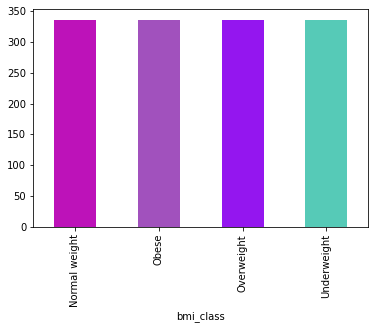

In [35]:
# balanced class distribution
print(df_balanced.groupby('bmi_class').size())
df_balanced.groupby('bmi_class').size().plot(kind = 'bar', color = ['#bd12b9',
                                                                    '#a151bd',
                                                                    '#9416ef',
                                                                    '#56cab7'])

## Data Visualization

### Variable Plots

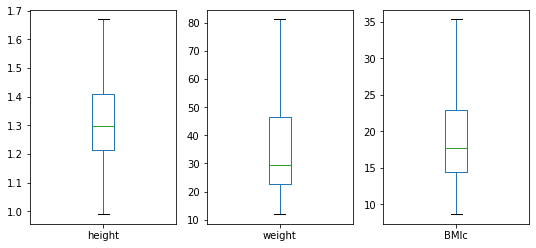

In [36]:
# box and whisker plots
numerical_df = df_balanced.select_dtypes(include = 'float')
numerical_df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False,
 showfliers = False, figsize = (10, 10))
plt.tight_layout() # fixes the axes overlapping issue
pyplot.show()

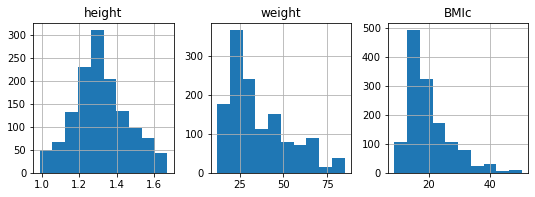

In [37]:
# histograms
numerical_df.hist(layout = (4,4), figsize = (10, 10))
plt.tight_layout()
pyplot.show()

<AxesSubplot:>

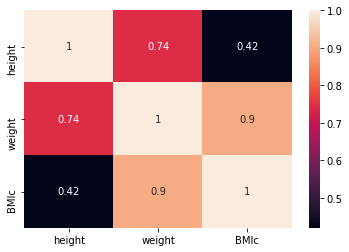

In [38]:
# Heatmap showing the relationship between numerical values
import seaborn as sns
sns.heatmap(numerical_df.corr(), annot=True)

In [39]:
#categorical_features = df_balanced.select_dtypes(include=['object']).columns #create a list of categorical features from your training set
#feat_cat = df_balanced[categorical_features] #build a data frame with just the categorical values from your training set

## Algorithms Comparison

In [40]:
def enc_bmi_class(bmi):
            if  bmi == 'Obese':
                return 0
            elif bmi == 'Overweight':
                return 1
            elif bmi == 'Normal weight':
                return 2
            elif bmi == 'Underweight':
                return 3
            else:
                return 'null'
df_balanced['bmi_class'] = df_balanced['bmi_class'].apply(enc_bmi_class)

In [41]:
def pred_bmi_class(num):
            if  num == 0:
                return 'Obese'
            elif num == 1:
                return 'Overweight'
            elif num == 2:
                return 'Normal weight'
            elif num == 3:
                return 'Underweight'
            else:
                return 'null'

In [42]:
df_pred.drop('BMI_Percentile', axis = 1, inplace = True)
df_balanced.drop('BMI_Percentile', axis = 1, inplace = True)

In [43]:
df_pred.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,Patient_is_Overwiegh,Obesity_identified,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,1,0,14,1.296318,83.0,49.391809,0,1,1,15,113,Obese
1,1,0,13,1.296318,42.0,24.993445,0,0,1,8,113,Normal weight
2,1,1,14,1.296318,46.1,27.433282,0,0,1,12,63,Normal weight
3,1,1,14,1.296318,67.0,39.870496,1,0,1,8,113,Overweight
4,1,0,13,1.560000,49.0,20.134780,0,0,1,12,106,Normal weight


In [44]:
df_balanced.head()

,Patient_seen_at,Gender,Age,height,weight,BMIc,Patient_is_Overwiegh,Obesity_identified,Age10yrs,Diagnosis,Diagnosis_other,bmi_class
0,1,0,14,1.296318,83.0,49.391809,0,1,1,15,113,0
1,1,0,13,1.296318,42.0,24.993445,0,0,1,8,113,2
2,1,1,14,1.296318,46.1,27.433282,0,0,1,12,63,2
3,1,1,14,1.296318,67.0,39.870496,1,0,1,8,113,1
4,1,0,13,1.560000,49.0,20.134780,0,0,1,12,106,2


In [45]:
df_balanced['bmi_class'].describe()

count    1344.00000
mean        1.50000
std         1.11845
min         0.00000
25%         0.75000
50%         1.50000
75%         2.25000
max         3.00000
Name: bmi_class, dtype: float64

##### Split into Training and Testing

In [46]:
# Split-out validation dataset
array = df_balanced.values
X = array[:,0:10]
Y = array[:,11]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# summarize
print('Input', X.shape)
print('Output', Y.shape)

print('X_train', X_train.shape)
print('X_test', X_test.shape)

print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

Input (1344, 10)
Output (1344,)
X_train (1075, 10)
X_test (269, 10)
Y_train (1075,)
Y_test (269,)


##### Model Testing

In [47]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators = 1344 )))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(
    n_estimators=1344, random_state=1)))
models.append(('XGBoost',  XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))
models.append(('NB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    # scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    # cv_results = cross_validate(model, X_train, Y_train, cv = kfold, scoring=scoring,
    #                                 error_score="raise", return_train_score = True)
    # cv_results_df = pd.DataFrame.from_dict(cv_results)
    # results.append(cv_results)
    # names.append(name)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring='f1_macro') #micro is for imbalanced data
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.936382 (0.027666)
LDA: 0.743667 (0.026982)
SVM: 0.929242 (0.012662)
RF: 0.961517 (0.011744)
KNN: 0.852632 (0.017773)
CART: 0.949353 (0.021859)
AdaBoost: 0.669949 (0.000391)
XGBoost: 0.966270 (0.009573)
NB: 0.687488 (0.047308)


##### Comparing the Models

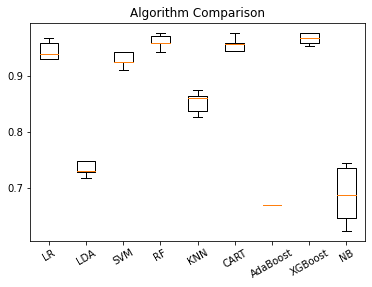

<Figure size 1440x1440 with 0 Axes>

In [48]:
# Compare Algorithms
pyplot.boxplot(results, labels=names, showfliers=False)
pyplot.title('Algorithm Comparison')

plt.rcParams["figure.figsize"] = [5, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 22})

plt.xticks(rotation=30)
plt.figure(figsize=(20, 20))

pyplot.show()

## Prediction Model

As shown above, XGBoost has the highest f1 score. Therefore, we can build our model based on it.

### Make Predictions

In [49]:
# Make predictions on validation dataset
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

### Prediction Results

In [50]:
df_x = pd.DataFrame(X_test)
df_x = df_x.reset_index()
df_y = pd.DataFrame(predictions, columns = (["predicted_bmi_class"]))
df_predicted = df_x.join(df_y)
df_predicted['predicted_bmi_class'] = df_predicted['predicted_bmi_class'].apply(pred_bmi_class)
df_predicted

,index,0,1,2,3,4,5,6,7,8,9,predicted_bmi_class
0,0,0.0,1.0,9.0,1.370000,42.0,22.377324,0.0,1.0,0.0,0.0,Obese
1,1,1.0,0.0,6.0,1.050000,14.0,12.698413,0.0,0.0,0.0,1.0,Underweight
2,2,1.0,0.0,7.0,1.296318,19.0,11.306559,0.0,0.0,0.0,12.0,Underweight
3,3,0.0,0.0,6.0,1.190000,26.0,18.360285,0.0,1.0,0.0,12.0,Obese
4,4,0.0,1.0,9.0,1.220000,20.4,13.705993,0.0,0.0,0.0,0.0,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,0.0,0.0,12.0,1.440000,34.0,16.396605,0.0,0.0,1.0,0.0,Normal weight
265,265,1.0,0.0,6.0,1.330000,22.0,12.437108,1.0,0.0,0.0,12.0,Overweight
266,266,0.0,0.0,7.0,1.060000,14.7,13.082948,0.0,0.0,0.0,0.0,Underweight
267,267,1.0,0.0,9.0,1.296318,43.9,26.124101,0.0,1.0,0.0,12.0,Obese


In [51]:
df_yact = pd.DataFrame(Y_test, columns = ["bmi_class"])
df_yact = df_yact.reset_index()
df_ys = df_yact.join(df_y)
df_ys['bmi_class'] = df_ys['bmi_class'].apply(pred_bmi_class)
df_ys

,index,bmi_class,predicted_bmi_class
0,0,Obese,0
1,1,Underweight,3
2,2,Normal weight,3
3,3,Obese,0
4,4,Underweight,3
...,...,...,...
264,264,Normal weight,2
265,265,Overweight,1
266,266,Underweight,3
267,267,Obese,0


### Evaluate Predictions

In [52]:
# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9479553903345725
[[70  0  0  0]
 [ 0 63  0  0]
 [ 0  0 63 13]
 [ 0  0  1 59]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70
         1.0       1.00      1.00      1.00        63
         2.0       0.98      0.83      0.90        76
         3.0       0.82      0.98      0.89        60

    accuracy                           0.95       269
   macro avg       0.95      0.95      0.95       269
weighted avg       0.96      0.95      0.95       269



 The accuracy is 95%. The rest of the evaluation metrics are shown in the breakdown in the classification report above.

[Text(0, 0.5, 'Obese'),
 Text(0, 1.5, 'Overweight'),
 Text(0, 2.5, 'Normal'),
 Text(0, 3.5, 'Under')]

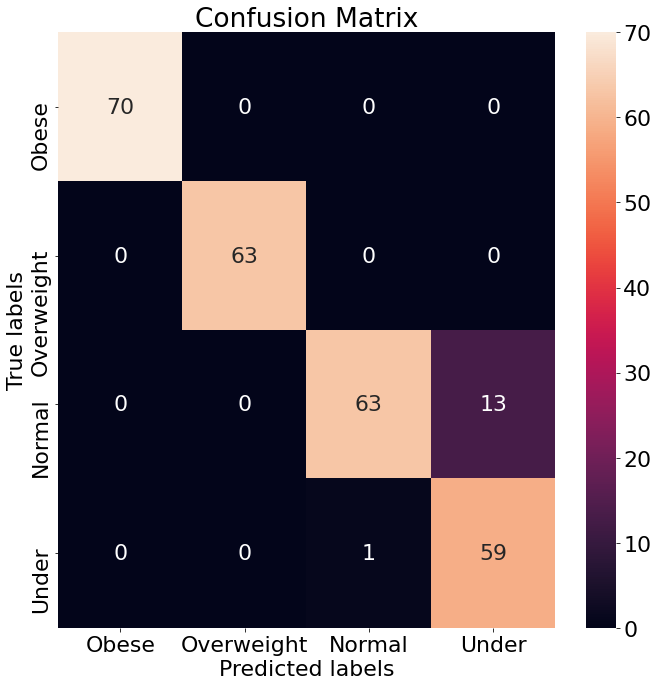

In [53]:
#plt.xticks(rotation=30)
plt.figure(figsize=(10, 10))
cm = confusion_matrix(Y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Obese', 'Overweight', 'Normal', 'Under'])
ax.yaxis.set_ticklabels(['Obese', 'Overweight', 'Normal', 'Under'])

Check out the metrics for (Normal Weight). Precision is high, meaning that the model was careful to avoid labeling things “Normal Weight” that aren’t normal weight. On the other hand, recall is relatively low, which means that the classifier is missing a bunch of normal weights because it is being too careful! The F1 score reflects this imbalance.

On its own, a classification report tells us generally what kind of errors the model made, but it doesn’t give us specifics. The confusion matrix tells us exactly where mistakes were made, but it doesn’t give us summary metrics like precision, recall, or F1 score. Using both of these can give us a much more nuanced understanding of how our model performs, going far beyond what an accuracy score can tell us and avoiding some of its pitfalls.

***

_End of Implementation_